In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('Salary.csv')


In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.shape

(3755, 11)

In [5]:
df.isnull()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df = df.drop(['salary', 'salary_currency'], axis=1)

In [8]:
df.shape

(3755, 9)

In [9]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False


In [10]:
# Program To Check Duplicates in the database

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool

In [12]:
# Program To See the unique values from all the columns

In [13]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

In [14]:
print("\nUnique values from each column:")
for column, values in unique_values.items():
    print(column + ":", values)


Unique values from each column:
work_year: [2023 2022 2020 2021]
experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied

In [15]:
#Renaming the experience level columns as below.		
#SE – Senior Level/Expert
#MI – Medium Level/Intermediate
#EN – Entry Level
#EX – Executive Level

In [16]:
level_mapping = {
    'SE': 'Senior Level/Expert',
    'MI': ' Medium Level/Intermediate',
    'EN': 'Entry Level',
    'EX':' Executive Level'
}


In [17]:
df['experience_level'] = df['experience_level'].replace(level_mapping)

print("\nDF after renaming 'experience_level' column:")
print(df)


DF after renaming 'experience_level' column:
      work_year            experience_level employment_type  \
0          2023         Senior Level/Expert              FT   
1          2023   Medium Level/Intermediate              CT   
2          2023   Medium Level/Intermediate              CT   
3          2023         Senior Level/Expert              FT   
4          2023         Senior Level/Expert              FT   
...         ...                         ...             ...   
3750       2020         Senior Level/Expert              FT   
3751       2021   Medium Level/Intermediate              FT   
3752       2020                 Entry Level              FT   
3753       2020                 Entry Level              CT   
3754       2021         Senior Level/Expert              FT   

                     job_title  salary_in_usd employee_residence  \
0     Principal Data Scientist          85847                 ES   
1                  ML Engineer          30000                

In [18]:
#Data Analysis Part
# Summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable.

In [19]:
from scipy.stats import skew, kurtosis


In [20]:
# Choosing a variable for summary statistics
chosen_variable = 'salary_in_usd'

# Calculate summary statistics
summary_stats = df[chosen_variable].describe()
variable_sum = df[chosen_variable].sum()
variable_skewness = skew(df[chosen_variable])
variable_kurtosis = kurtosis(df[chosen_variable])

# Print summary statistics
print("Summary statistics for variable", chosen_variable)
print(summary_stats)
print("\nSum:", variable_sum)
print("Mean:", summary_stats['mean'])
print("Standard deviation:", summary_stats['std'])
print("Skewness:", variable_skewness)
print("Kurtosis:", variable_kurtosis)

Summary statistics for variable salary_in_usd
count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

Sum: 516576814
Mean: 137570.38988015978
Standard deviation: 63055.625278224084
Skewness: 0.5361868674235593
Kurtosis: 0.8312989014514311


In [21]:
# program to calculate and show correlation of all variables.

In [22]:
df_numeric = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
correlation_matrix = df_numeric.corr()

print("Correlation matrix of all variables:")
print(correlation_matrix)

Correlation matrix of all variables:
                    work_year  experience_level  employment_type  job_title  \
work_year            1.000000         -0.167648        -0.115248  -0.156954   
experience_level    -0.167648          1.000000         0.125208   0.127764   
employment_type     -0.115248          0.125208         1.000000   0.060485   
job_title           -0.156954          0.127764         0.060485   1.000000   
salary_in_usd        0.228290         -0.243669        -0.126923  -0.067952   
employee_residence  -0.279475          0.208346         0.233934   0.187946   
remote_ratio        -0.236430          0.044598         0.059242   0.064941   
company_location    -0.261057          0.189563         0.129597   0.175600   
company_size         0.389401         -0.210922        -0.088431  -0.183533   

                    salary_in_usd  employee_residence  remote_ratio  \
work_year                0.228290           -0.279475     -0.236430   
experience_level        -0.243

In [23]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level/Expert,FT,Data Scientist,412000,US,100,US,L
3751,2021,Medium Level/Intermediate,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,Entry Level,FT,Data Scientist,105000,US,100,US,S
3753,2020,Entry Level,CT,Business Data Analyst,100000,US,100,US,L


In [24]:
# Now lets explore our data


In [25]:
# Finding Top paid jobs on the basis of salaries in usd

average_salary_per_job = df.groupby('job_title')['salary_in_usd'].mean()


In [26]:
top_jobs = average_salary_per_job.nlargest(15)
top_jobs

job_title
Data Science Tech Lead                 375000.000000
Cloud Data Architect                   250000.000000
Data Lead                              212500.000000
Data Analytics Lead                    211254.500000
Principal Data Scientist               198171.125000
Director of Data Science               195140.727273
Principal Data Engineer                192500.000000
Machine Learning Software Engineer     192420.000000
Data Science Manager                   191278.775862
Applied Scientist                      190264.482759
Principal Machine Learning Engineer    190000.000000
Head of Data                           183857.500000
Data Infrastructure Engineer           175051.666667
Business Intelligence Engineer         174150.000000
Machine Learning Scientist             163220.076923
Name: salary_in_usd, dtype: float64

In [27]:
import matplotlib.pyplot as plt


In [28]:
#plotting data in bar diagram

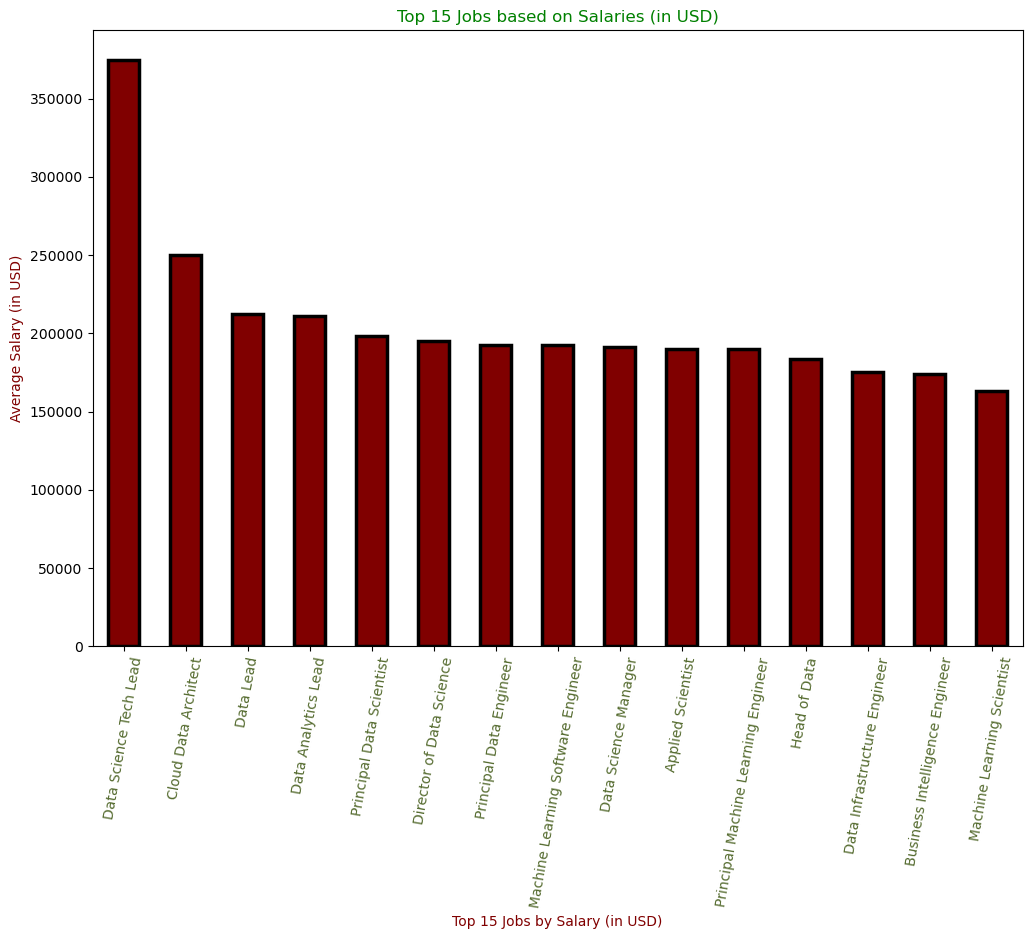

In [29]:
plt.figure(figsize=(12, 8))
top_jobs.plot(kind='bar', color='Maroon', edgecolor='black', linewidth=2.5)
plt.xlabel('Top 15 Jobs by Salary (in USD)',color='Maroon')
plt.ylabel('Average Salary (in USD)', color='Maroon')
plt.title('Top 15 Jobs based on Salaries (in USD)', color='Green')
plt.xticks(rotation=80, color='darkolivegreen' )
plt.show()

In [30]:

# top 15 jobs

top_jobs = df['job_title'].value_counts().head(15)


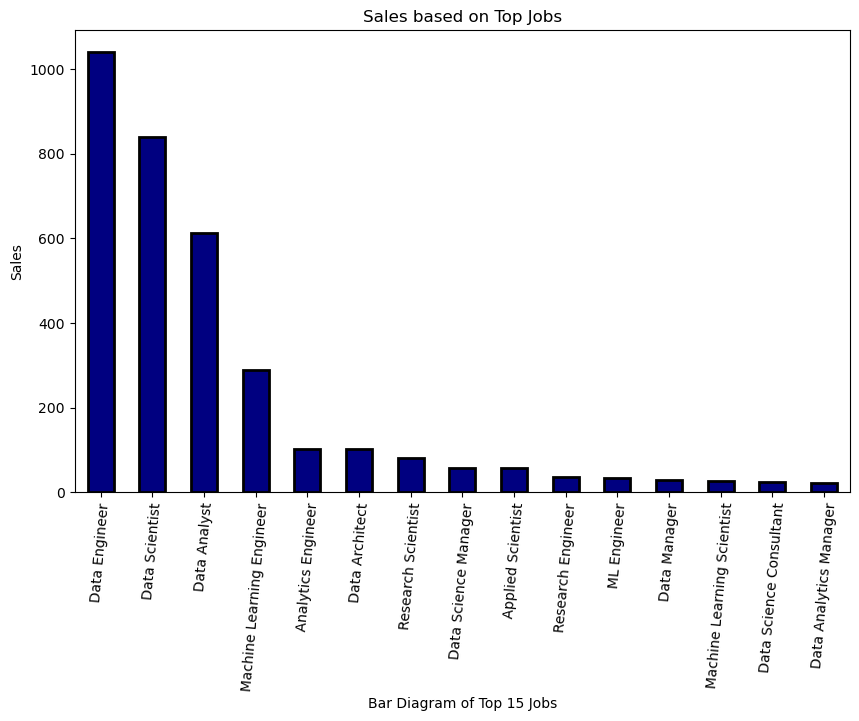

In [31]:

# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_jobs.plot(kind='bar', color='navy', edgecolor='black', linewidth=2)
plt.xlabel('Bar Diagram of Top 15 Jobs')
plt.ylabel('Sales')
plt.title('Sales based on Top Jobs')
plt.xticks(rotation=85)
plt.show()

In [32]:
# Calculate average salary for each experience level
average_salary_per_experience = df.groupby('experience_level')['salary_in_usd'].mean()


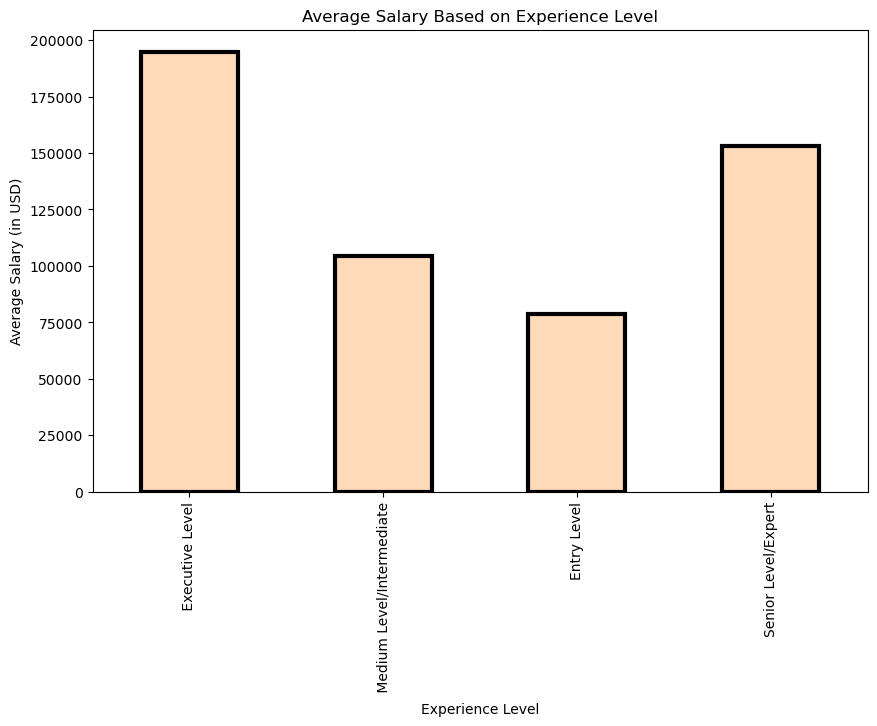

In [33]:
# Plotting the bar graph of experience level
plt.figure(figsize=(10, 6))
average_salary_per_experience.plot(kind='bar', color='Maroon', edgecolor='black', linewidth=3, facecolor='peachpuff')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (in USD)')
plt.title('Average Salary Based on Experience Level')
plt.xticks(rotation=90)
plt.show()

In [34]:
#Choosing the numerical column for histogram and Box Plots
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [35]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print("Numerical columns:")
print(numerical_columns)

Numerical columns:
Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')


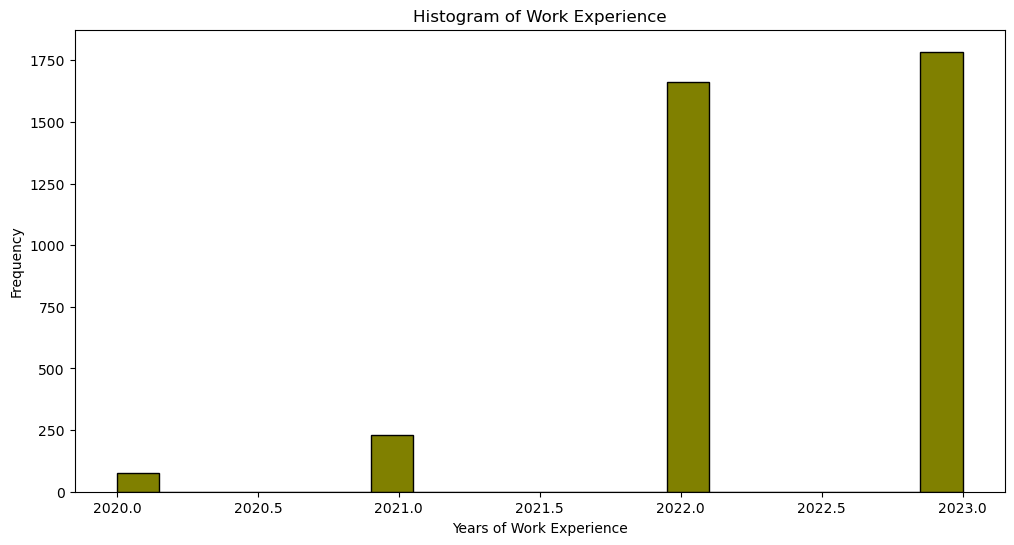

In [36]:

# Filter out missing values
df.dropna(subset=['work_year', 'salary_in_usd'])

# Plotting histogram for work_year
plt.figure(figsize=(12, 6))
plt.hist(df['work_year'], color='olive', edgecolor='black', bins=20)
plt.xlabel('Years of Work Experience')
plt.ylabel('Frequency')
plt.title('Histogram of Work Experience')
plt.show()


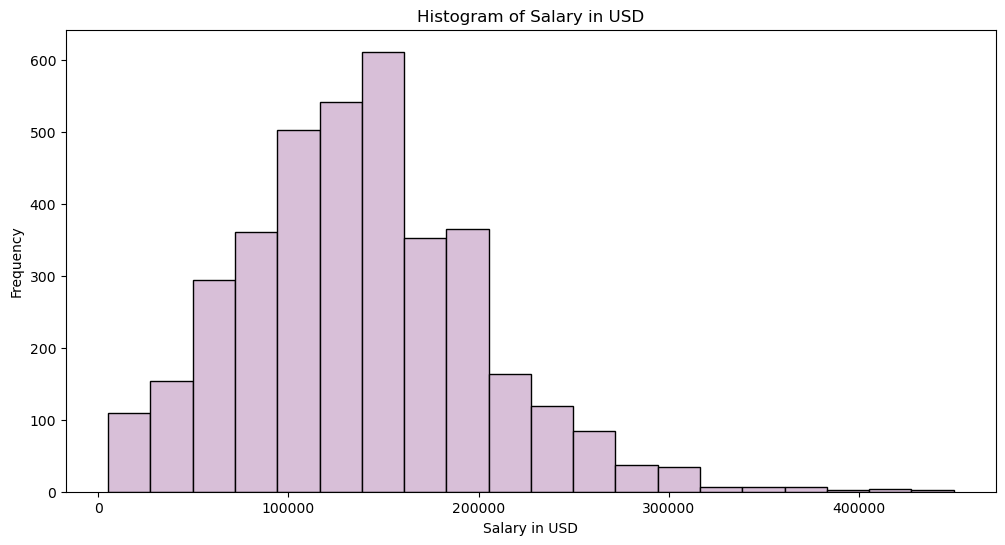

In [37]:

# Plotting histogram for salary_in_usd

plt.figure(figsize=(12, 6))
plt.hist(df['salary_in_usd'], color='thistle', edgecolor='black', bins=20)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Histogram of Salary in USD')


plt.hist
plt.show()




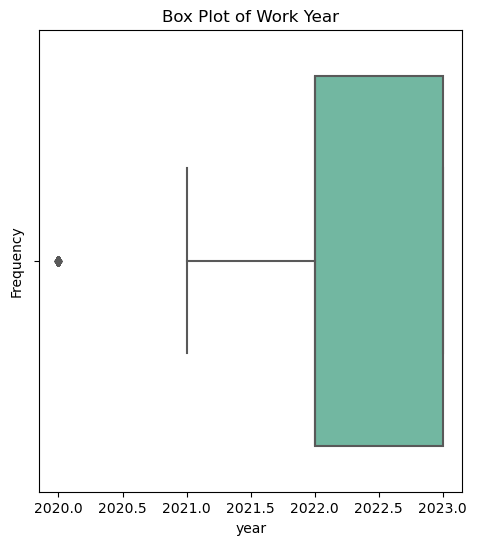

In [38]:

# Box plotting Of Work Year
df.dropna(subset=['work_year'])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x=df['work_year'], orient='h', palette='BuGn_r', linewidth=1.5)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Box Plot of Work Year')
plt.show()

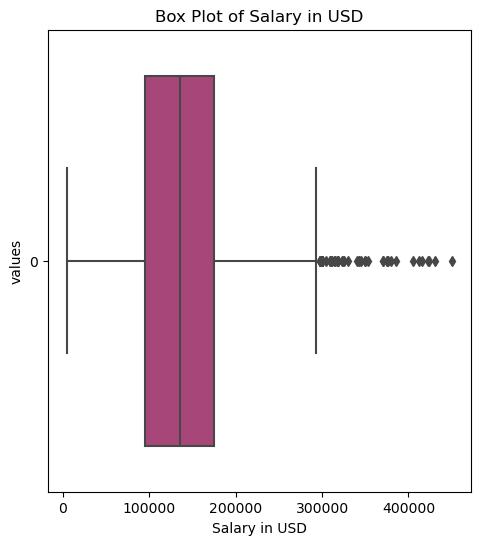

In [39]:
#Box Plotting Of Salary In USD
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=df['salary_in_usd'], orient='h', palette='magma', linewidth=1.5, )
plt.xlabel('Salary in USD')
plt.ylabel('values')
plt.title('Box Plot of Salary in USD')
plt.show()


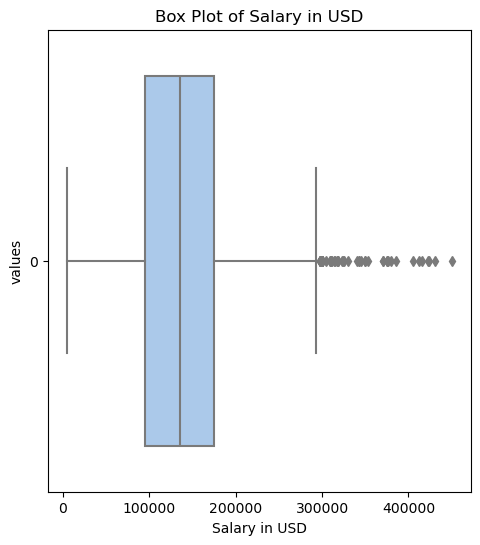

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=df[ 'salary_in_usd'], orient='h', palette='pastel', linewidth=1.5)
plt.xlabel('Salary in USD')
plt.ylabel('values')
plt.title('Box Plot of Salary in USD')
plt.show()